In [22]:
import os
import torch
from torchinfo import summary

## Create Vision Transformer (ViT)

In [15]:
from melanoma_classification import VisionTransformer

In [ ]:
vit = VisionTransformer()
vit.load_pretrained_weights('deit_base_patch16_224')
vit.set_classifier(num_classes=2)

## Prepare data

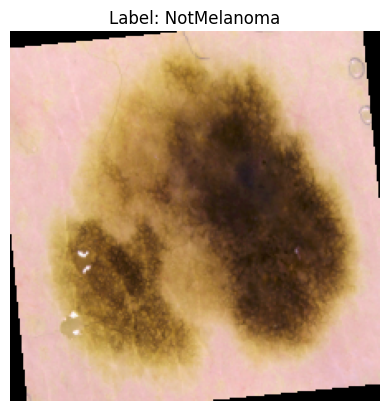

In [19]:
from utils.dermmel import DermMel
from melanoma_classification.utils.transformations import (
    train_transform,
    production_transform
)

train_dataset = DermMel(
    '../data',
    split='train_sep',
    transform=train_transform()
)
train_dataloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=2,
    shuffle=True,
    num_workers=4
)

valid_dataset = DermMel(
    '../data',
    split='valid',
    transform=production_transform()
)
valid_dataloader = torch.utils.data.DataLoader(
    valid_dataset,
    batch_size=2,
    shuffle=True,
    num_workers=4
)

train_dataset.visualize_image(-1)

## Training

In [20]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(vit.parameters(), lr=0.0001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

In [21]:
# Init device
device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')
elif torch.mps.is_available():
    device = torch.device('mps')

In [ ]:
from training.trainer import train

# model: nn.Module,
# train_loader: DataLoader,
# val_loader: DataLoader,
# criterion: nn.Module,
# optimizer: optim.Optimizer,
# scheduler: optim.lr_scheduler._LRScheduler,
# num_epochs: int,
# device: torch.device,
# checkpoint_path: str,
# save_every_n_epochs: int = 5,
# resume_training: bool = False,
# checkpoint_model_file: callable = None,
# checkpoint_metrics_file: str = 'metrics.csv'

train(
    model=vit,
    train_loader=train_dataloader,
    val_loader=valid_dataloader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler,
    num_epochs=10,
    device=device,
    checkpoint_path='checkpoints/dermmel',
    save_every_n_epochs=1
)